In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import pickle as pkl
import copy
import matplotlib.patches as mpatches
from utils import OPT_PATH as opt_path
# refer to https://matplotlib.org/stable/api/markers_api.html
markers = ["o", "v", "s", "*", "D"]
# refer to https://matplotlib.org/stable/gallery/color/named_colors.html
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
# https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
linestyles = 'solid'
# refer to https://github.com/bvalgard/Boxplots/blob/master/Boxplots.ipynb

## Universality v.s. Transferability

### I-FGSM

In [3]:
path = glob.glob(os.path.join(opt_path, '*-DTMI-*motivation_IFGSM/eval_universal.npy'))
json_path = glob.glob(os.path.join(opt_path, '*-DTMI-*motivation_IFGSM/pert_to_OriImageInd.json'))
eval_universal = np.load(path[0])
with open(json_path[0], 'r') as ipt:
    pert_to_OriImageInd = json.load(ipt)
# obtain each pert's white-box universal 
ifgsm_white_universal = []
for pert_ind in range(1000):
    preds = eval_universal[2][pert_ind]
    image_id = pert_to_OriImageInd[str(pert_ind)]
    preds = np.delete(preds, image_id)
    ifgsm_white_universal.append(np.sum(preds))
ifgsm_white_universal = np.array(ifgsm_white_universal)

### DTMI

In [65]:
path = glob.glob(os.path.join(opt_path, '*-DTMI-*motivation/eval_universal.npy'))
json_path = glob.glob(os.path.join(opt_path, '*-DTMI-*motivation/pert_to_OriImageInd.json'))
eval_universal = np.load(path[0])
with open(json_path[0], 'r') as ipt:
    pert_to_OriImageInd = json.load(ipt)
# obtain each pert's white-box universal 
dtmi_white_universal = []
for pert_ind in range(1000):
    preds = eval_universal[2][pert_ind]
    image_id = pert_to_OriImageInd[str(pert_ind)]
    preds = np.delete(preds, image_id)
    dtmi_white_universal.append(np.sum(preds))
dtmi_white_universal = np.array(dtmi_white_universal)

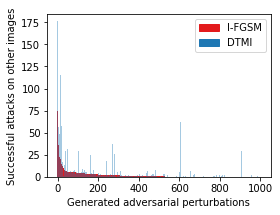

In [66]:
fig = plt.figure(figsize=(4,3)) 
ax1 = fig.add_subplot(111)
ind = np.argsort(-ifgsm_white_universal)
ax1.bar(range(len(ind)), np.array(ifgsm_white_universal)[ind], width=1, alpha=1, color=sns.color_palette("Paired")[5])
# ax1.set_yticks([0.00, 0.10, 0.20, 0.30, 0.40, 0.50])
# ax2 = fig.add_subplot(312)
ax1.bar(range(len(ind)), np.array(dtmi_white_universal)[ind], width=1, alpha=0.4, color=sns.color_palette("Paired")[1])
# ax3 = fig.add_subplot(313)
# ax3.bar(range(len(ind)), np.array(local_dtmi_white_universal)[ind], width=1, alpha=0.5, color='orange')


labels = ['I-FGSM', 'DTMI'] 
color = [sns.color_palette("Paired")[5], sns.color_palette("Paired")[1]]
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(color)) ] 
ax=plt.gca()
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width , box.height* 0.8])
ax.legend(handles=patches, fontsize=10) #生成legend
plt.xlabel('Generated adversarial perturbations')
plt.ylabel('Successful attacks on other images')
# plt.show()
plt.savefig('./figures/perturbation_universality.pdf', format='pdf', bbox_inches = 'tight')

### SI 

In [8]:
path = glob.glob(os.path.join('/share_io02_ssd/zhipeng/targeted_attack_loss/', 'Loss-resnet50-NIPSDataset-SI_DTMI-Target_CE-baseline/eval_universal.npy'))
json_path = glob.glob(os.path.join('/share_io02_ssd/zhipeng/targeted_attack_loss/', 'Loss-resnet50-NIPSDataset-SI_DTMI-Target_CE-baseline/pert_to_OriImageInd.json'))
eval_universal = np.load(path[0])
with open(json_path[0], 'r') as ipt:
    pert_to_OriImageInd = json.load(ipt)
# obtain each pert's white-box universal 
SI_white_universal = []
for pert_ind in range(1000):
    preds = eval_universal[2][pert_ind]
    image_id = pert_to_OriImageInd[str(pert_ind)]
    preds = np.delete(preds, image_id)
    SI_white_universal.append(np.sum(preds))
SI_white_universal = np.array(SI_white_universal)

Text(0, 0.5, 'Successful attacks on other images')

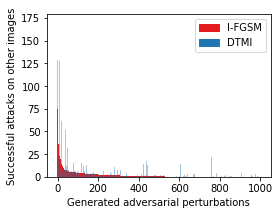

In [12]:
fig = plt.figure(figsize=(4,3)) 
ax1 = fig.add_subplot(111)
ind = np.argsort(-ifgsm_white_universal)
ax1.bar(range(len(ind)), np.array(ifgsm_white_universal)[ind], width=1, alpha=1, color=sns.color_palette("Paired")[5])
# ax1.set_yticks([0.00, 0.10, 0.20, 0.30, 0.40, 0.50])
# ax2 = fig.add_subplot(312)
ax1.bar(range(len(ind)), np.array(SI_white_universal)[ind], width=1, alpha=0.4, color=sns.color_palette("Paired")[1])
# ax3 = fig.add_subplot(313)
# ax3.bar(range(len(ind)), np.array(local_dtmi_white_universal)[ind], width=1, alpha=0.5, color='orange')


labels = ['I-FGSM', 'DTMI'] 
color = [sns.color_palette("Paired")[5], sns.color_palette("Paired")[1]]
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(color)) ] 
ax=plt.gca()
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width , box.height* 0.8])
ax.legend(handles=patches, fontsize=10) #生成legend
plt.xlabel('Generated adversarial perturbations')
plt.ylabel('Successful attacks on other images')
# plt.show()
# plt.savefig('./figures/perturbation_universality.pdf', format='pdf', bbox_inches = 'tight')

### Admix

In [10]:
path = glob.glob(os.path.join('/share_io02_ssd/zhipeng/targeted_attack_loss/', 'Loss-resnet50-NIPSDataset-Admix_DTMI-Target_CE-baseline/eval_universal.npy'))
json_path = glob.glob(os.path.join('/share_io02_ssd/zhipeng/targeted_attack_loss/', 'Loss-resnet50-NIPSDataset-Admix_DTMI-Target_CE-baseline/pert_to_OriImageInd.json'))
eval_universal = np.load(path[0])
with open(json_path[0], 'r') as ipt:
    pert_to_OriImageInd = json.load(ipt)
# obtain each pert's white-box universal 
admix_white_universal = []
for pert_ind in range(1000):
    preds = eval_universal[2][pert_ind]
    image_id = pert_to_OriImageInd[str(pert_ind)]
    preds = np.delete(preds, image_id)
    admix_white_universal.append(np.sum(preds))
admix_white_universal = np.array(admix_white_universal)

Text(0, 0.5, 'Successful attacks on other images')

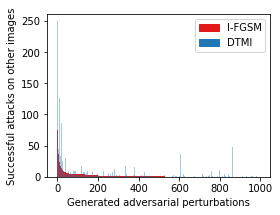

In [13]:
fig = plt.figure(figsize=(4,3)) 
ax1 = fig.add_subplot(111)
ind = np.argsort(-ifgsm_white_universal)
ax1.bar(range(len(ind)), np.array(ifgsm_white_universal)[ind], width=1, alpha=1, color=sns.color_palette("Paired")[5])
# ax1.set_yticks([0.00, 0.10, 0.20, 0.30, 0.40, 0.50])
# ax2 = fig.add_subplot(312)
ax1.bar(range(len(ind)), np.array(admix_white_universal)[ind], width=1, alpha=0.4, color=sns.color_palette("Paired")[1])
# ax3 = fig.add_subplot(313)
# ax3.bar(range(len(ind)), np.array(local_dtmi_white_universal)[ind], width=1, alpha=0.5, color='orange')


labels = ['I-FGSM', 'DTMI'] 
color = [sns.color_palette("Paired")[5], sns.color_palette("Paired")[1]]
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(color)) ] 
ax=plt.gca()
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width , box.height* 0.8])
ax.legend(handles=patches, fontsize=10) #生成legend
plt.xlabel('Generated adversarial perturbations')
plt.ylabel('Successful attacks on other images')
# plt.show()
# plt.savefig('./figures/perturbation_universality.pdf', format='pdf', bbox_inches = 'tight')